In [2]:
%matplotlib inline
# Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model and data processing packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
np.random.seed(234)

In [4]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [8]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(460, 8) (308, 8) (460,) (308,)


In [10]:
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)

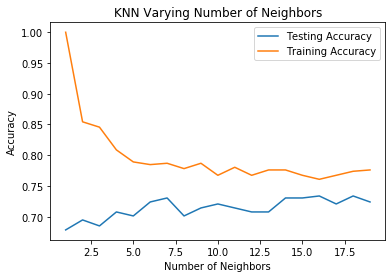

In [11]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying Number of Neighbors')
plt.show()

In [12]:
n_neighbors=18
knn = KNeighborsClassifier(n_neighbors)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [14]:
knn.score(X_test, y_test)

0.7337662337662337

In [15]:
y_pred = knn.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[175,  26],
       [ 56,  51]])

In [17]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,175,26,201
1,56,51,107
All,231,77,308


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       201
           1       0.66      0.48      0.55       107

    accuracy                           0.73       308
   macro avg       0.71      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



In [19]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [20]:
# FPR = False Positive Rate, TPR = True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

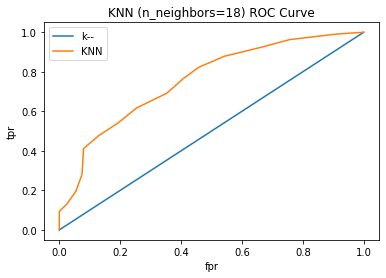

In [21]:
plt.plot([0,1],[0,1], label='k--')
plt.plot(fpr, tpr, label='KNN')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'KNN (n_neighbors={n_neighbors}) ROC Curve')
plt.show()

In [260]:
roc_auc_score(y_test, y_pred_proba)

0.7566606221230296

In [261]:
param_grid = {'n_neighbors':np.arange(1,100)}

In [262]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [263]:
knn_cv.best_score_

0.7578125

In [264]:
knn_cv.best_params_

{'n_neighbors': 14}

In [265]:
n_neighbors=14
knn = KNeighborsClassifier(n_neighbors)

In [266]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [267]:
knn.score(X_test, y_test)

0.7305194805194806

In [268]:
y_pred = knn.predict(X_test)

In [269]:
confusion_matrix(y_test, y_pred)

array([[173,  28],
       [ 55,  52]])

In [270]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,173,28,201
1,55,52,107
All,228,80,308


In [272]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       201
           1       0.65      0.49      0.56       107

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



In [273]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [274]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

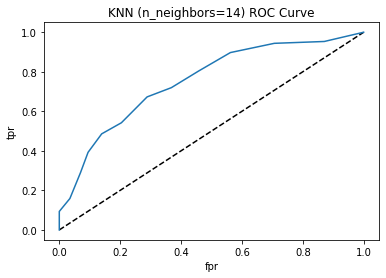

In [275]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'KNN (n_neighbors={n_neighbors}) ROC Curve')
plt.show()

In [276]:
roc_auc_score(y_test, y_pred_proba)

0.7523596968428884